What is Natural Language Processing?
- Feild of study focused on making sense of language (using statistics and computers)
- Topic identification, Text classification
- Chatbots, Translation, Sentiment analysis

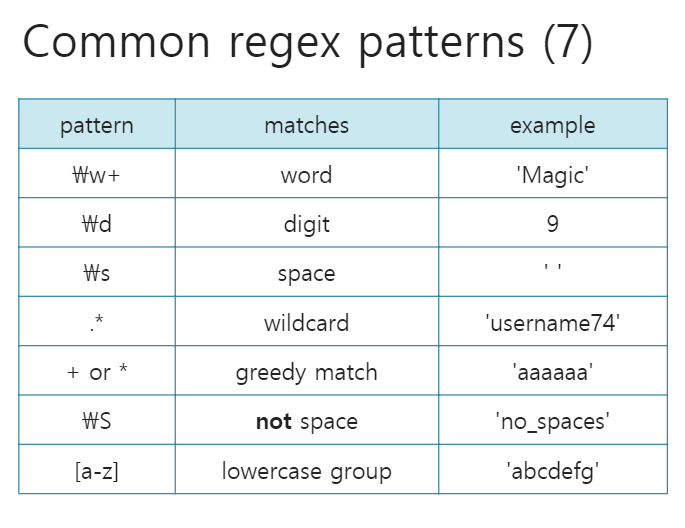

- 정규표현식 (regular expression)

In [2]:
my_string = "Let's write RegEx! Won't that be fun? I sure think so. Can you find 4 sentences? or perhaps, all 19 words?"

In [3]:
import re

# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))


["Let's write RegEx", " Won't that be fun", ' I sure think so', ' Can you find 4 sentences', ' or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


What is tokenization?
- Turning a string or document into tokens (smaller chunks)
- One step in preparing a text for NLP
- Many different theories and rules
- You can create your own rules using regular explressions.
(단어마다, 구두점마다, 해쉬태그마다)

Other nltk tokenizers
- sent_tokenize : tokenize a document into sentences
- regexp_tokenize : tokenize a string or document based on a regular expression pattern
- TweetTokenizer : special class just for tweet tokenization, allowing you to separate hashtags, mentions and lots of exclamation points!!

toy data load

In [4]:
from sklearn.datasets import fetch_20newsgroups
text_data = fetch_20newsgroups(subset='train')['data'][0]
text_data

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [14]:
# Import necessary modules
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\likeo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- 문장단위로

In [5]:
# Split text into sentences: sentences
sentences = sent_tokenize(text_data)

In [6]:
sentences

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?",
 'Nntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day.',
 'It was a 2-door sports car, looked to be from the late 60s/\nearly 70s.',
 'It was called a Bricklin.',
 'The doors were really small.',
 'In addition,\nthe front bumper was separate from the rest of the body.',
 'This is \nall I know.',
 'If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 'Thanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----']

단어 단위로, 중복제거

In [8]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(text_data)

# Make a set of unique tokens in the entire text: unique_tokens
unique_tokens = set(word_tokenize(text_data))

# Print the unique tokens result
print(unique_tokens)

{'can', 'IL', ':', '60s/', 'Maryland', 'separate', 'Thanks', 'wam.umd.edu', 'saw', 'were', 'doors', 'to', 'me', 'history', 'Subject', 'early', 'addition', 'engine', 'a', 'front', "'s", 'looking', 'model', '70s', 'Lines', 'rest', 'there', 'If', 'you', 'College', 'I', 'whatever', 'made', 'day', 'where', 'funky', '!', 'sports', 'production', '@', '.', '-', 'years', 'bumper', 'called', 'all', '(', 'tellme', '--', ',', 'the', 'anyone', 'could', '?', 'small', 'looked', 'lerxst', 'info', 'In', 'It', 'body', 'my', 'other', 'is', 'know', 'enlighten', 'specs', 'Organization', 'out', 'The', 'wondering', 'this', 'name', ')', 'WHAT', 'from', 'From', '2-door', 'Bricklin', 'car', 'This', '15', 'or', 'Park', 'rac3.wam.umd.edu', 'on', 'University', 'please', 'thing', 'Nntp-Posting-Host', 'if', 'really', 'by', 'neighborhood', 'e-mail', 'brought', 'be', 'your', 'of', 'late', 'have', 'Lerxst', 'was'}


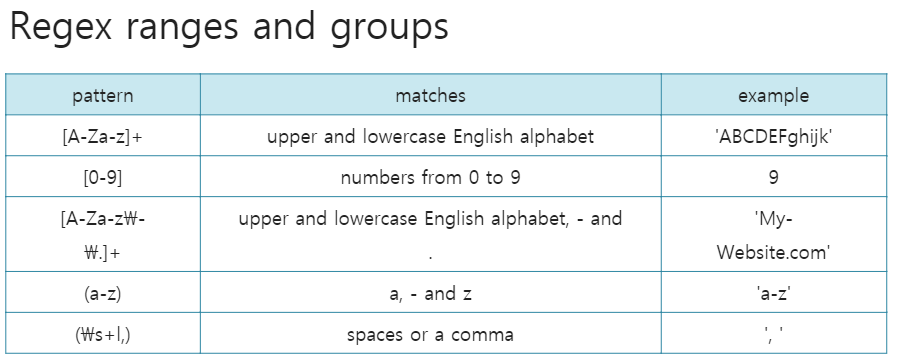

- 고급 정규표현식

In [9]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

pattern=r"(\w+|#\d|\?|!)"

In [11]:
nltk.tokenize.regexp_tokenize(my_string, pattern)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

- Charting practice


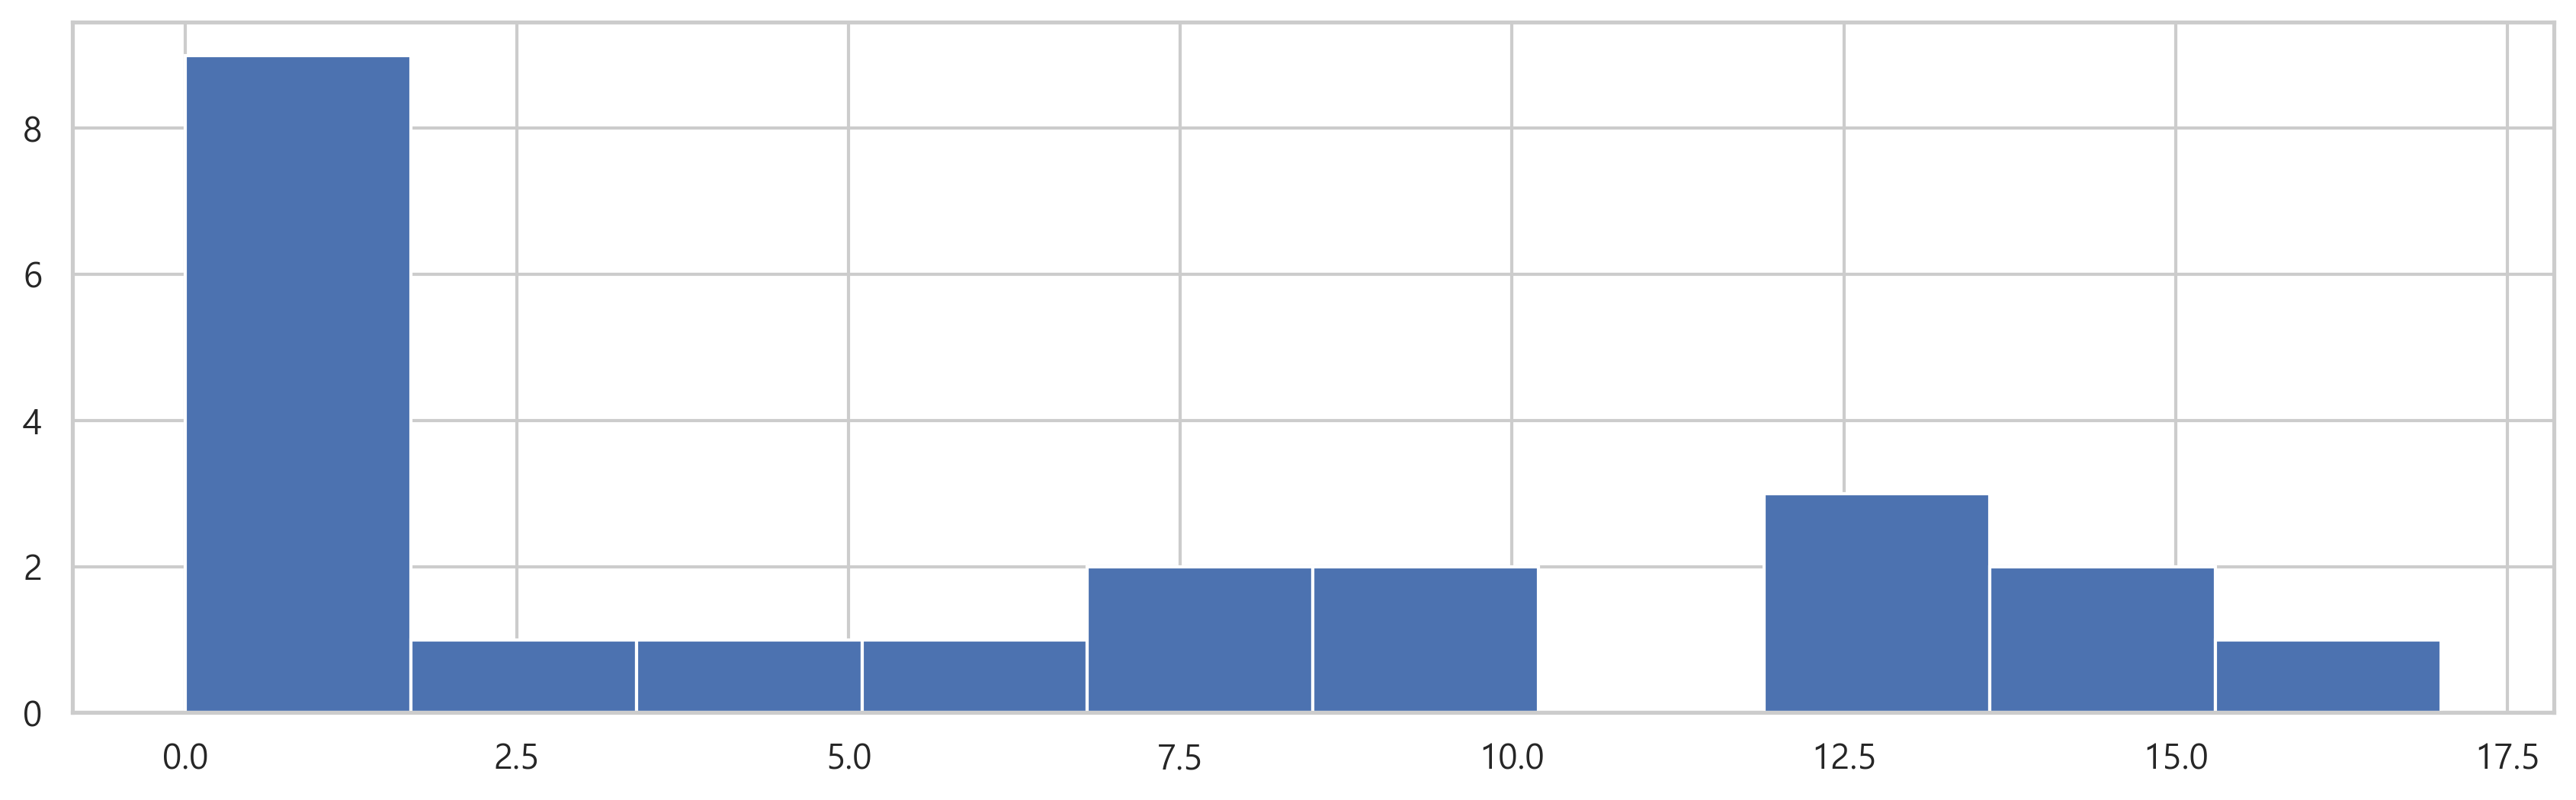

In [15]:
import re
# Split the script into lines: lines
lines = text_data.split('\n')
lines
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]
lines
# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s,'\w+') for s in lines]
tokenized_lines
# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
_ = plt.hist(line_num_words)

# Show the plot
plt.show()

In [ ]:
# Tokenize and print all words in german_text
#all_words = word_tokenize(german_text)
#print(all_words)

# Tokenize and print only capital words
#capital_words = r"[A-ZÜ]\w+"
#print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
#emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
#print(regexp_tokenize(german_text, emoji))